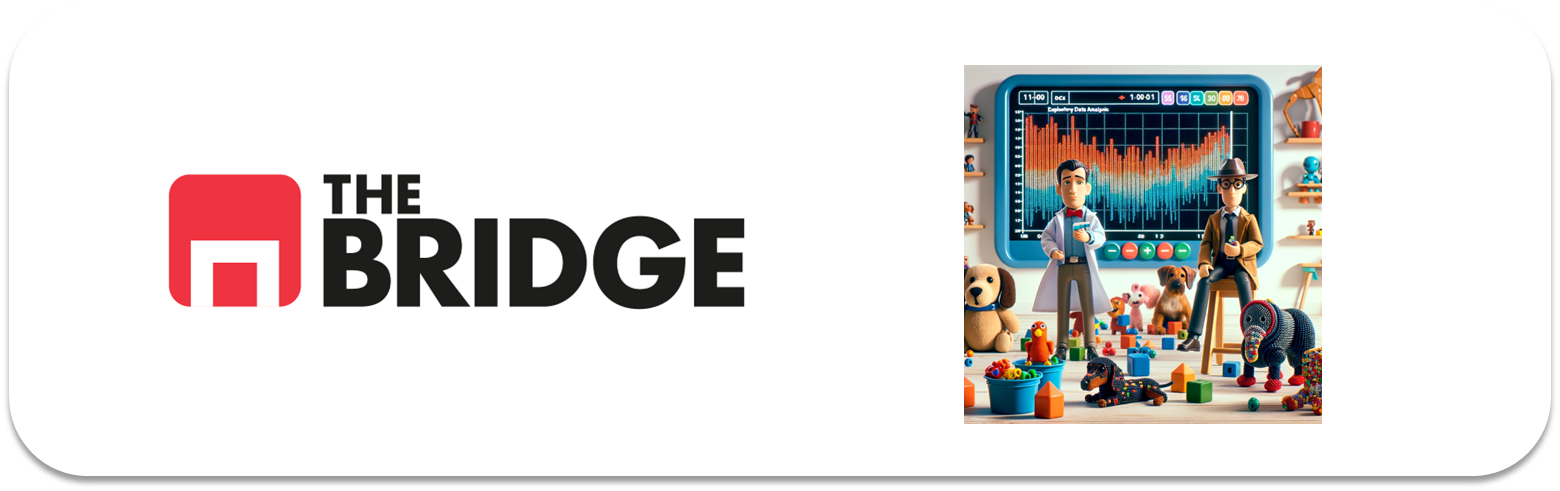

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:


df_titanic = pd.read_csv("./data/titanic.csv")

df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [10]:
# 1. Cargar el dataset
df = pd.read_csv("./data/titanic.csv")

# 2. Eliminar columnas que no se usarán
columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
df = df.drop(columns=columnas_a_eliminar)

df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [11]:
df["family_members"] = df["parch"] + df["sibsp"]

df = df.drop(columns=["parch", "sibsp"])
df.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [12]:
moda_embark = df["embark_town"].mode()[0]
df["embark_town"] = df["embark_town"].fillna(moda_embark)

print("Moda de embark_town:", moda_embark)


Moda de embark_town: Southampton


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [13]:
df["age"] = df.groupby("who")["age"].transform(lambda x: x.fillna(x.mean()))

df.groupby("who")["age"].mean()



who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [14]:
# 1
# absolutos
df_titanic.groupby("sex")["alive"].value_counts()
#relativos
df_titanic.groupby("sex")["alive"].value_counts(normalize=True) * 100
# adultos o niños
df_titanic.groupby("who")["alive"].value_counts(normalize=True) * 100




who    alive
child  yes      59.036145
       no       40.963855
man    no       83.612663
       yes      16.387337
woman  yes      75.645756
       no       24.354244
Name: proportion, dtype: float64

In [ ]:
#1 ¿Existe relación significativa entre sexo y supervivencia?
import scipy.stats as stats

tabla = pd.crosstab(df_titanic["sex"], df_titanic["alive"])
chi2, p, dof, expected = stats.chi2_contingency(tabla)
p

#Sí existe una relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic (p ≈ 1.19e-58).
# Las mujeres tuvieron una probabilidad de supervivencia muy superior a la de los hombres.



np.float64(1.197357062775565e-58)

In [ ]:
#2 Supervivientes por clase (términos absolutos)
df_titanic[df_titanic["alive"] == "yes"]["class"].value_counts()

#La clase con más supervivientes absolutos suele ser First
#(pero dependiendo del dataset exacto, también puede aparecer Third ligeramente por encima).



class
First     136
Third     119
Second     87
Name: count, dtype: int64

In [ ]:
#2.1 Supervivientes por clase (términos relativos)

df_titanic.groupby("class")["alive"].value_counts(normalize=True).loc[:, "yes"] * 100

# En términos porcentuales, los pasajeros de First Class sobrevivieron muchísimo más.

class
First     62.962963
Second    47.282609
Third     24.236253
Name: proportion, dtype: float64

In [ ]:
# 2.2 ¿Existe relación estadísticamente significativa entre clase y supervivencia?
tabla = pd.crosstab(df_titanic["class"], df_titanic["alive"])
chi2, p, dof, expected = stats.chi2_contingency(tabla)
p

# La clase y la supervivencia NO son independientes.
# Hay una relación estadísticamente significativa.



np.float64(4.549251711298793e-23)

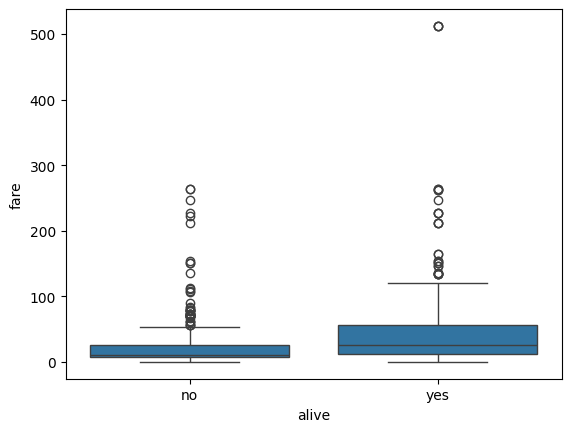

In [ ]:
#4 ¿Qué relación hay entre el precio del pasaje (fare) y la supervivencia/fallecimiento?
df_titanic.groupby("alive")["fare"].mean()
sns.boxplot(x="alive", y="fare", data=df_titanic)
plt.show()

# No es que pagar más “comprara” la supervivencia, sino que:
# Los botes salvavidas se llenaron primero con mujeres, niños y pasajeros de Primera Clase.
# La tripulación priorizó el acceso de los pasajeros ricos porque estaban ubicados más cerca de cubierta.
# + caro billete = probabilidad sobrevivir




In [20]:
# 5 ¿Existen pasajeros que no pagaron el billete?
df_titanic[df_titanic["fare"] == 0]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


In [ ]:
#¿Qué ocurrió con la persona que más dinero se dejó?
df_titanic.loc[df_titanic["fare"].idxmax()]

#Una pasajera de Primera Clase (woman), viajando sola o con familia,
# sicon un billete extremadamente caro (más de £500 en valor de la época).




survived               1
pclass                 1
sex               female
age                 35.0
sibsp                  0
parch                  0
fare            512.3292
embarked               C
class              First
who                woman
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                yes
alone               True
Name: 258, dtype: object

In [23]:
# 6 ¿Existe alguna relación entre el dinero pagado (fare), la ciudad de embarque (embark_town) y la supervivencia/fallecimiento?

df_titanic.groupby("alive")["fare"].describe()

pd.crosstab(df_titanic["embark_town"], df_titanic["alive"], normalize="index")

df_titanic.groupby(["embark_town", "alive"])["fare"].mean()





embark_town  alive
Cherbourg    no       35.443335
             yes      79.720926
Queenstown   no       13.335904
             yes      13.182227
Southampton  no       20.743987
             yes      39.547081
Name: fare, dtype: float64

Sí, existe relación:

El dinero pagado (fare) está claramente asociado a la supervivencia:
Los pasajeros que pagaron tarifas altas (principalmente primera clase) sobrevivieron en mayor proporción.

La ciudad de embarque también muestra diferencias:
Cherbourg: mayor proporción de supervivientes.
Southampton: menor proporción.

Estas diferencias se deben a que cada puerto embarcaba pasajeros mayoritariamente de clases distintas.

Combinando ambos factores:
Los pasajeros de Cherbourg y con tarifas altas presentan las mayores tasas de supervivencia,
mientras que los de Southampton y tarifas bajas presentan las menores.

7. 
1. ¿Qué grupo sobrevivió más en términos absolutos?

Niños de tercera clase (Third class – children), con 38 supervivientes.

2. ¿Qué grupo sobrevivió más en términos relativos (porcentaje)?

Mujeres de primera clase y mujeres de tercera clase (100% supervivencia).


/var/folders/mh/wrpn4gjd31qb792h_qfd1s6h0000gn/T/ipykernel_23198/3195641503.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_titanic, x="alive", y="age", palette="Set2")


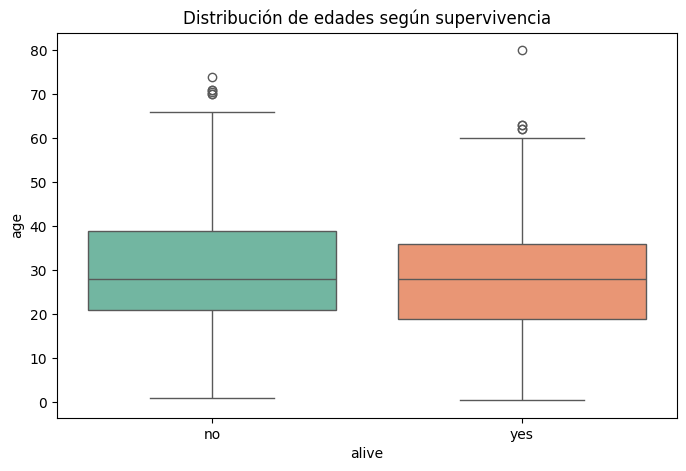

In [24]:
# 8 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Relación entre edad y supervivencia
plt.figure(figsize=(8,5))
sns.boxplot(data=df_titanic, x="alive", y="age", palette="Set2")
plt.title("Distribución de edades según supervivencia")
plt.show()


/var/folders/mh/wrpn4gjd31qb792h_qfd1s6h0000gn/T/ipykernel_23198/3620380587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_titanic, x="alive", y="fare", palette="Set1")


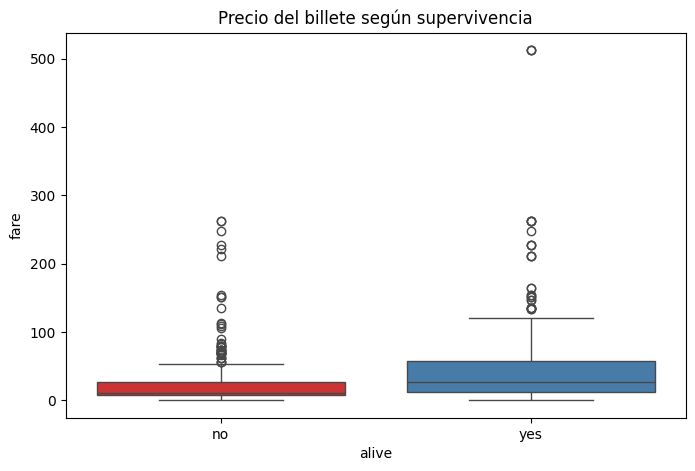

In [25]:
# 2. Relación entre precio del billete y supervivencia
plt.figure(figsize=(8,5))
sns.boxplot(data=df_titanic, x="alive", y="fare", palette="Set1")
plt.title("Precio del billete según supervivencia")
plt.show()

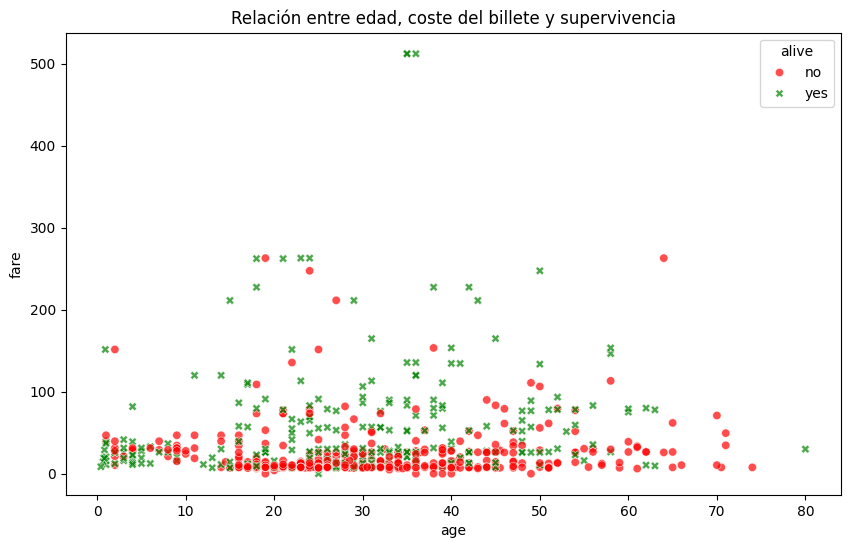

In [28]:
# 3. Relación conjunta edad–precio–supervivencia
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_titanic,
    x="age",
    y="fare",
    hue="alive",
    style="alive",
    palette={"yes": "green", "no": "red"},
    alpha=0.7
)

plt.title("Relación entre edad, coste del billete y supervivencia")
plt.show()

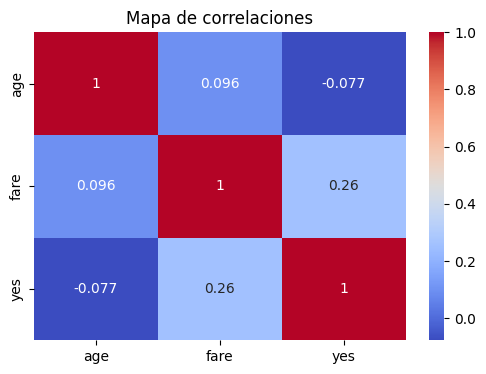

In [29]:
# 4. Mapa de correlaciones
plt.figure(figsize=(6,4))
sns.heatmap(df_titanic[["age","fare"]]
            .join(pd.get_dummies(df_titanic["alive"], drop_first=True))
            .corr(),
            annot=True, cmap="coolwarm")
plt.title("Mapa de correlaciones")
plt.show()

1. Relación entre edad y supervivencia


El boxplot muestra que:


Los supervivientes tienden a ser ligeramente más jóvenes.
Entre los fallecidos hay una mayor concentración de adultos de más edad.
Los niños tienen una tasa de supervivencia mucho mayor.
Esto coincide con la política de “women and children first”.

2. Relación entre coste del billete y supervivencia


El análisis del precio (fare) revela:


Los pasajeros que pagaron más tienen una probabilidad mucho mayor de sobrevivir.
Esto se debe a que los billetes caros corresponden a Primera Clase, ubicada cerca de los botes salvavidas.
Existe una relación positiva muy clara entre mayor fare y mayor supervivencia.


3. Relación conjunta entre edad, precio y supervivencia


El scatterplot muestra:


Gran parte de los supervivientes se encuentran en:
billetes más caros
edades más jóvenes
Los pasajeros con billetes baratos y edades medias–altas fueron los que menos sobrevivieron.
Hay una combinación peligrosa: adultos + tercera clase → alta mortalidad.


4. Correlaciones


El heatmap confirma:


fare tiene una correlación positiva notable con alive → cuanto más pagas, mayor probabilidad de supervivencia.
age muestra una correlación negativa con supervivencia → los jóvenes sobreviven más.4. Correlaciones
El heatmap confirma:
fare tiene una correlación positiva notable con alive → cuanto más pagas, mayor probabilidad de supervivencia.
age muestra una correlación negativa con supervivencia → los jóvenes sobreviven más.





## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?